In [1]:
library(tidyverse)
library(Seurat)
library(patchwork)
library(MAST)
library(future)
library(furrr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching packa

In [2]:
source("/data/rudensky/EYW/git_projects/SIG04_240816/functions/plotting_fxns.R")
theme_set(theme_Publication())

# Import Data

In [3]:
data <- readRDS("/data/rudensky/EYW//SIG04_240816/seurat_outs/SIG04_postqc_seurat.rds")
# subset to singlets only
data <- subset(data, subset = oBC_classification == "singlet")

# Overview

In [4]:
data@meta.data %>%
  group_by(oBC_feature_call) %>%
  summarise(n = n()) 

data@meta.data %>%
  filter(gem_group == "lane1") %>%
  group_by(oBC_feature_call) %>%
  summarise(n = n()) 

data@meta.data %>%
  filter(gem_group == "lane2") %>%
  group_by(oBC_feature_call) %>%
  summarise(n = n()) 

oBC_feature_call,n
<chr>,<int>
ADIPOQ,676
BMP10,583
BMP4,394
BMP7,417
CCL12,433
CCL19,698
CCL2,213
CCL21A,398
CCL25,697


oBC_feature_call,n
<chr>,<int>
ADIPOQ,286
BMP10,307
BMP4,196
BMP7,177
CCL12,167
CCL19,239
CCL2,101
CCL21A,157
CCL25,267


oBC_feature_call,n
<chr>,<int>
ADIPOQ,390
BMP10,276
BMP4,198
BMP7,240
CCL12,266
CCL19,459
CCL2,112
CCL21A,241
CCL25,430


`summarise()` has grouped output by 'gem_group'. You can override using the
`.groups` argument.


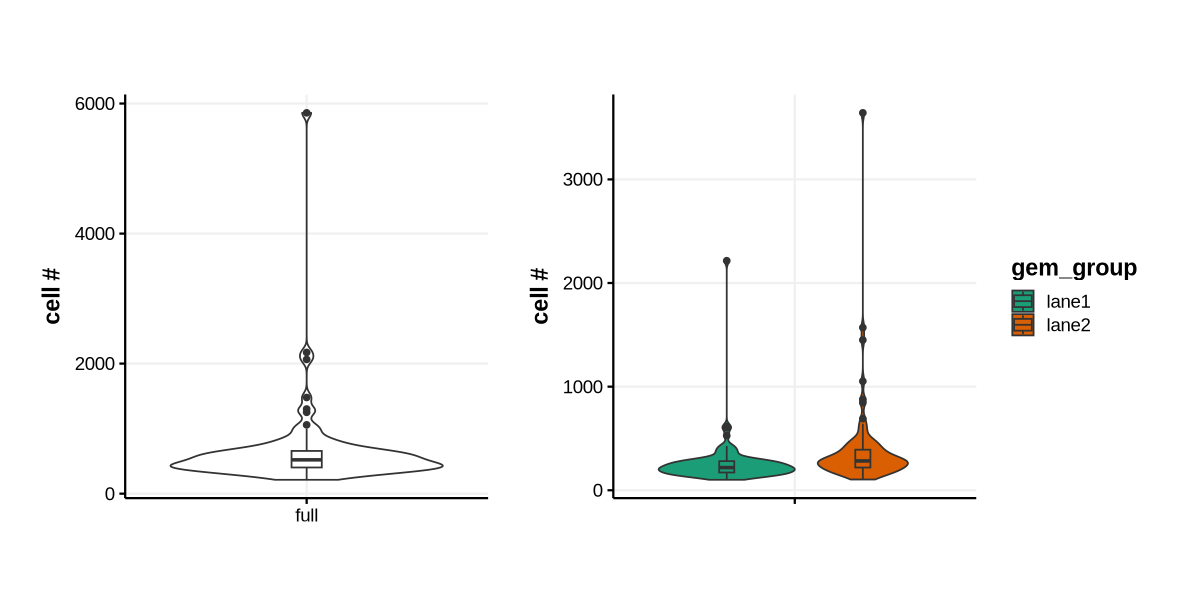

In [5]:
options(repr.plot.width=10, repr.plot.height=5)
p1 <- data@meta.data %>%
  group_by(oBC_feature_call) %>%
  summarise(n = n()) %>%
    ggplot(aes(x="full",y=n)) +
      geom_violin() +
      geom_boxplot(width=0.1) +
      xlab("") +
      ylab("cell #")

p2 <- data@meta.data %>%
  group_by(gem_group, oBC_feature_call) %>%
  summarise(n = n()) %>%
    ggplot(aes(x="",y=n, fill = gem_group)) +
      geom_violin() +
      geom_boxplot(width=0.1, position = position_dodge(0.9)) +
      scale_fill_brewer(palette="Dark2")+
      xlab("") +
      ylab("cell #")

p1+p2

# DEG 

I want to regress out the effects of more or less virus. Let's see if I can use the p139 mapped counts from the GEX data or if I should use the oBC counts


In [6]:
# add layer
data$p139_counts = FetchData(data, vars = "p139-T7oBC5p-MS2", layer = "scale.data")

Warning message:
“Could not find p139-T7oBC5p-MS2 in the default search locations, found in ‘RNA’ assay instead”


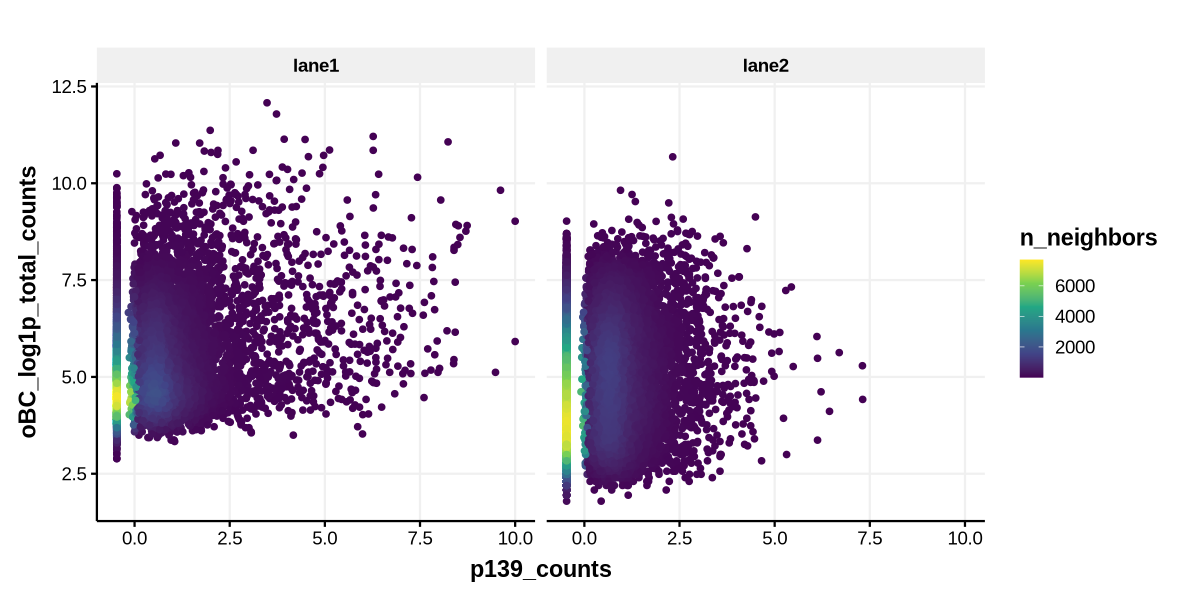

In [7]:
options(repr.plot.width=10, repr.plot.height=5)
library(ggpointdensity)

data@meta.data %>%
  ggplot(aes(x=p139_counts, y=oBC_log1p_total_counts)) +
    geom_pointdensity() +
    scale_color_viridis_c() +
    facet_wrap(~gem_group) +
    theme(aspect.ratio = 1)

I feel like the p139 transcript counts are a bit too sparse to be accurate. Lets use the oBC counts

## DEG for full dataset

In [9]:
# helper function for calculating DEGs
deg_MAST <- function(data,x,y){
  DefaultAssay(data) <- "RNA"
  Idents(data) <- "oBC_feature_call"
  # perform DEG analysis using seurat wrapper
  test <- FindMarkers(data,
              slot = "data", #MAST uses log normalized counts as input
              min.pct = 0.05,
              logfc.threshold=0.1,
              ident.1 = x, ident.2 = y,
              test.use = "MAST",
              latent.vars = c("gem_group","oBC_log1p_total_counts"))
  
  # make tibble tidy
  test <- test %>%
    as_tibble(rownames="genes") %>%
    mutate(comp_1 = x,
           comp_2 = y)
  
  return(test)
}

# get list of ligands (comp_1)
ligands <- data$oBC_feature_call %>% unique()
ligands <- ligands[grep("p129",ligands, invert = T)]

# set options for parallel analysis
plan(multisession, workers=parallelly::availableCores())
options(future.globals.maxSize= 10000*1024^2)

In [10]:
# run DEG helper function parallel
degFull <- future_map_dfr(ligands, ~ deg_MAST(data, .x, "p129"), seed=T)


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

Warning message:
“UNRELIABLE VALUE: Future (‘<none>’) unexpectedly generated random numbers without specifying argument 'seed'. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. 

In [13]:
write_csv(degFull,
          "/data/rudensky/EYW/git_projects/SIG04_240816/analysis_outs/DEG_MAST_full.csv")
write_csv(degFull %>% filter(p_val_adj < 0.1),
          "/data/rudensky/EYW/git_projects/SIG04_240816/analysis_outs/DEG_MAST_full_sig.csv")

In [14]:
degFull %>%
    filter(p_val_adj < 0.1) %>%
    group_by(comp_1) %>%
    summarise(n = n())

comp_1,n
<chr>,<int>
ADIPOQ,14
BMP10,1
BMP4,10
BMP7,5
CCL12,11
CCL19,37
CCL2,5
CCL21A,23
CCL25,103


## DEG analysis Lane 2 (sorted)
I will also run DEG analysis using only Lane 2, which is the sorted sample

In [4]:
# helper function for calculating DEGs
deg_MAST <- function(data,x,y){
  DefaultAssay(data) <- "RNA"
  Idents(data) <- "oBC_feature_call"
  # perform DEG analysis using seurat wrapper
  test <- FindMarkers(data,
              slot = "data", #MAST uses log normalized counts as input
              min.pct = 0.05,
              logfc.threshold=0.1,
              ident.1 = x, ident.2 = y,
              test.use = "MAST",
              latent.vars = c("oBC_log1p_total_counts"))
  
  # make tibble tidy
  test <- test %>%
    as_tibble(rownames="genes") %>%
    mutate(comp_1 = x,
           comp_2 = y)
  
  return(test)
}

# get list of ligands (comp_1)
ligands <- data$oBC_feature_call %>% unique()
ligands <- ligands[grep("p129",ligands, invert = T)]

# set options for parallel analysis
plan(multisession, workers=parallelly::availableCores())
options(future.globals.maxSize= 10000*1024^2)

In [5]:
dataLane2 <- subset(data, subset = gem_group == "lane2")

# run DEG helper function parallel
furrr_options(seed=NULL)
degLane2 <- future_map_dfr(ligands, ~ deg_MAST(dataLane2, .x, "p129"))

<furrr_options>


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

Warning message:
“UNRELIABLE VALUE: Future (‘<none>’) unexpectedly generated random numbers without specifying argument 'seed'. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. 

In [6]:
write_csv(degLane2,
          "/data/rudensky/EYW/git_projects/SIG04_240816/analysis_outs/DEG_MAST_lane2.csv")
write_csv(degLane2 %>% filter(p_val_adj < 0.1),
          "/data/rudensky/EYW/git_projects/SIG04_240816/analysis_outs/DEG_MAST_lane2_sig.csv")

In [7]:
degLane2 %>%
    filter(p_val_adj < 0.1) %>%
    group_by(comp_1) %>%
    summarise(n = n())

comp_1,n
<chr>,<int>
ADIPOQ,3
BMP4,4
BMP7,2
CCL12,4
CCL19,16
CCL2,4
CCL21A,13
CCL25,49
CCL7,14
